In [2]:
# importing libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'google.colab'

# 1 Question: Image Affine Transformation

In [ ]:
# A function that takes an input image and does 4 types of transformation
def transform(image, dx, dy, angle, scale_x, scale_y, shear_x, shear_y):
    # Translation
    transl_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
    height, width =(image.shape[0],image.shape[1])  # get height and width of the image
    translated_image = cv2.warpAffine(image, transl_matrix, (width, height)) #Using cv2.warpAffine to translate the image

    # Rotation
    height, width = translated_image.shape[:2] # Get translated image dimensions
    # get the center coordinates of the translated image to create the 2D rotation matrix
    center = (width / 2, height / 2)
    rotated_matrix = cv2.getRotationMatrix2D(center, angle, 1)  # Rotation matrix with no scale
    rotated_image = cv2.warpAffine(translated_image, rotated_matrix, (width, height)) #rotate the image using cv2.warpAffine

    # Scaling
    # Calculate the new image dimensions using the new scales of the rotated image
    new_width = int(width * scale_x)
    new_height = int(height * scale_y)
    scaled_image = cv2.resize(rotated_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)  # scale using cv.resize and cubic as interpolation method

    # Shearing
    # Adjusting shearing matrix based on new dimensions
    shear_transf_matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    sheared_image = cv2.warpAffine(scaled_image, shear_transf_matrix, (new_width, new_height))

    return sheared_image


In [1]:
# Reading the original image
q1_image = cv2.imread("ML4EO_Assignment3_ashimirw/Q1.TIF")
# change image color frorm BRG to RGB
q1_image = cv2.cvtColor(q1_image, cv2.COLOR_BGR2RGB)

## Transformation parameters
dx = 0.5
dy = 0.2
angle = 90
scale_x = 1.2
scale_y = 0.8
shear_x = 0.1
shear_y = 0.2

# call the transformation function
transformed_image = transform(q1_image, dx, dy, angle, scale_x, scale_y, shear_x, shear_y)

# Plot the original image and the transformed image
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Set up the figure and axes

axes[0].imshow(q1_image)  # Display the original image
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image)  # Display the transformed image
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()


NameError: name 'cv2' is not defined

# 2 Question : Image filtering

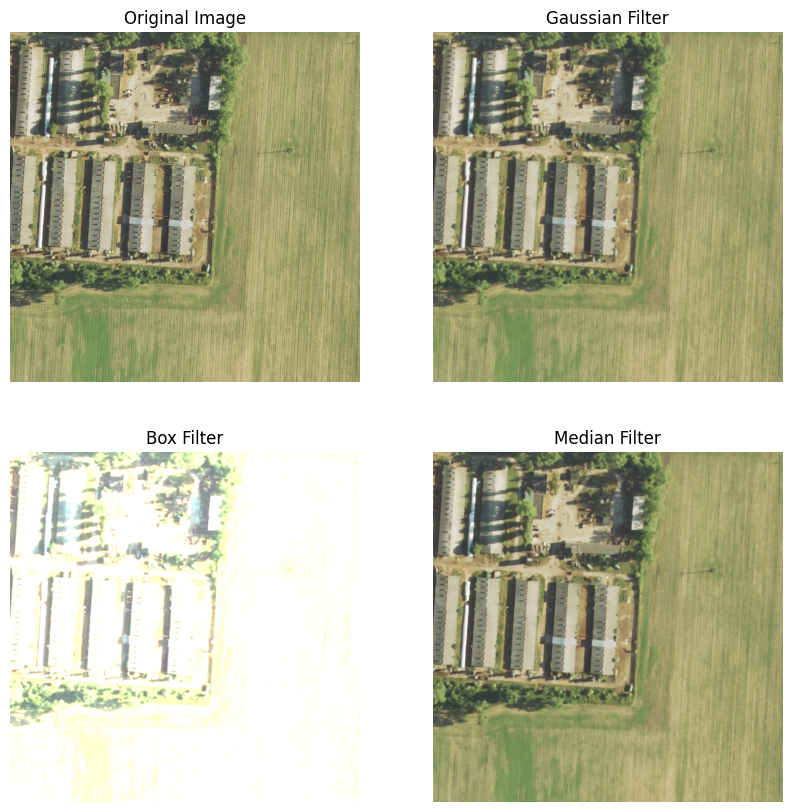

In [20]:
# read the original image (Q2)
q2_image = cv2.imread("/content/drive/MyDrive/ML4EO Course/Assignment 3/Q2.TIF")
q2_image = cv2.cvtColor(q2_image, cv2.COLOR_BGR2RGB)      ## change image color frorm BRG to RGB


# Gausian filter
gaussian_filter = cv2.GaussianBlur(q2_image,(5,5),0)

# Box filter
kernel = np.ones((5, 5), np.float32) * 0.1   # Creating a 5x5 kernel with all elements equal filled with  0.1
image_filtered = cv2.filter2D(q2_image, -1, kernel)   # Using cv2.filter2D() method to apply the custom kernel with -1 meaning the depth of the output image will be the same as the source image

# median filter using median blur
median_filter = cv2.medianBlur(q2_image,5)

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10,10 ))  # 2x2 subplot grid

# Original image
axes[0, 0].imshow(q2_image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Gaussian filter
axes[0, 1].imshow(gaussian_filter)
axes[0, 1].set_title('Gaussian Filter')
axes[0, 1].axis('off')

# Box filter
axes[1, 0].imshow(image_filtered)
axes[1, 0].set_title('Box Filter')
axes[1, 0].axis('off')

# Median filter
axes[1, 1].imshow(median_filter)
axes[1, 1].set_title('Median Filter')
axes[1, 1].axis('off')

# Display the plot
plt.show()

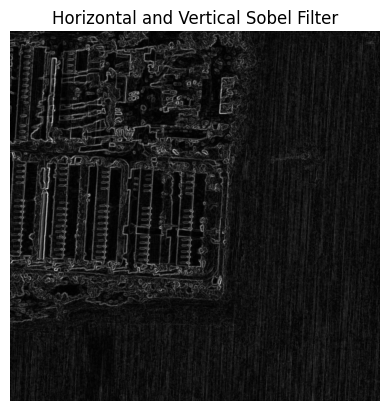

In [21]:
# Sobel filter

# read the image and convert to grayscale for better vizualization results
q2_image = cv2.imread("/content/drive/MyDrive/ML4EO Course/Assignment 3/Q2.TIF",  cv2.IMREAD_GRAYSCALE)


# Using image that has been undergone noise reduction Gausian filter for better edge detection
gauss_filter = cv2.GaussianBlur(q2_image,(3,3),0)

# convolute with sobel kernels: dx=1 dy=0 for horizontal and dx=0 dy=1 for vertical and  the depth of the output image 64-bit float
sobel_horizontal = cv2.Sobel(gauss_filter,cv2.CV_64F,1,0,ksize=5)  # horizontal with kernel size of 5x5
sobel_vertical = cv2.Sobel(gauss_filter,cv2.CV_64F,0,1,ksize=5)  # vertical with kernel size of 5x5

# Combine horizontal and vertical Sobel filter results
sobel_combined = np.abs(sobel_horizontal) + np.abs(sobel_vertical)

# Plot the combined Sobel filter
plt.imshow(sobel_combined, cmap='gray')
plt.title('Horizontal and Vertical Sobel Filter')
plt.axis('off')
plt.show()

# 3 Question: Image registration

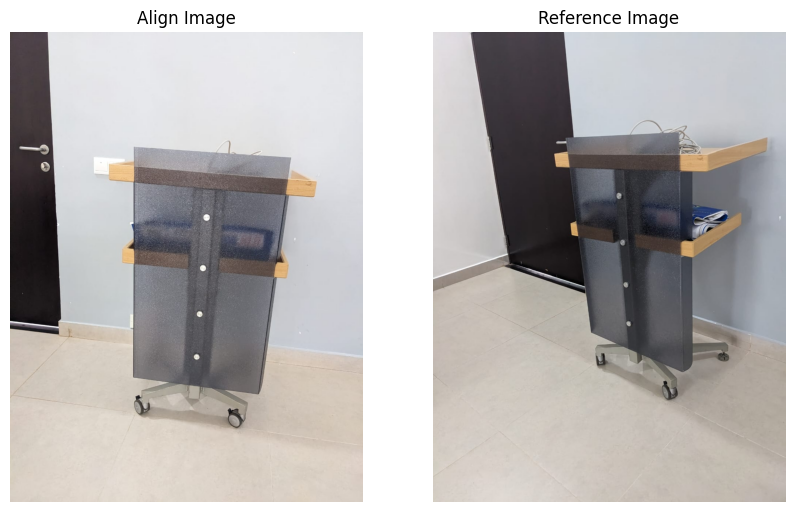

In [22]:
# Read the align image and reference images and visualize them

align_image= cv2.imread("/content/drive/MyDrive/ML4EO Course/Assignment 3/Align.jpeg")
align_image = cv2.cvtColor(align_image, cv2.COLOR_BGR2RGB)      ## change image color frorm BRG to RGB

refer_image= cv2.imread("/content/drive/MyDrive/ML4EO Course/Assignment 3/Reference.jpeg")
refer_image = cv2.cvtColor(refer_image, cv2.COLOR_BGR2RGB)      ## change image color frorm BRG to RGB

# Vizualize the two images
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(align_image)
axes[0].set_title('Align Image')
axes[0].axis('off')  # Hide the axes ticks

axes[1].imshow(refer_image)
axes[1].set_title('Reference Image')
axes[1].axis('off')  # Hide the axes ticks

plt.show()

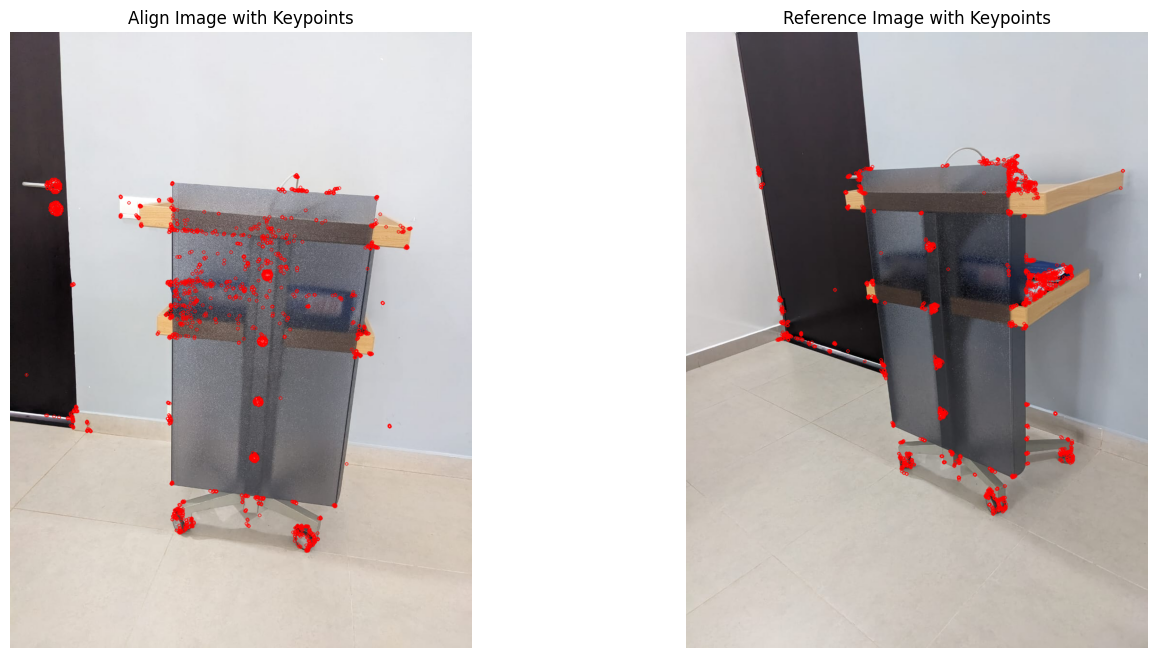

In [23]:
# Find key points in each image

# using ORB

# Initialize ORB detector, increase the number of kepoints displayed for deyection of many key points
orb = cv2.ORB_create(nfeatures=2000)

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(align_image, None)
kp2, des2 = orb.detectAndCompute(refer_image, None)

# Draw keypoints on image with the created ORB detector
align_image_keypoints = cv2.drawKeypoints(align_image, kp1, None, color=(255, 0, 0), flags=0)
refer_image_keypoints = cv2.drawKeypoints(refer_image, kp2, None, color=(255, 0, 0), flags=0)

# Visualize the keypoints
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(align_image_keypoints)
axes[0].set_title('Align Image with Keypoints')
axes[0].axis('off')

axes[1].imshow(refer_image_keypoints)
axes[1].set_title('Reference Image with Keypoints')
axes[1].axis('off')

plt.show()


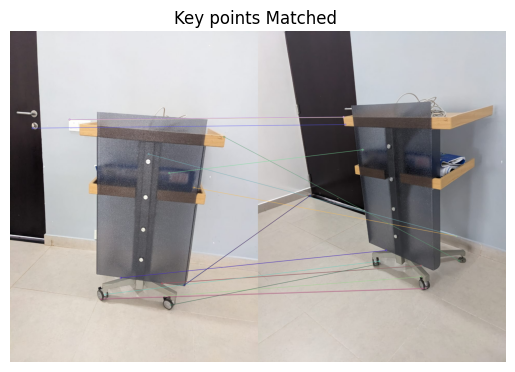

In [24]:
# Maching key points with ORB using Brute-Force Matcher (BF Matcher)

# create BFMatcher object with hamming distance measurement cv.NORM_HAMMING and crosscheck is for obtaining good results
bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match ORB descriptors
orb_matches = bf_matcher.match(des1,des2)
# Sort them in the order of their distance
orb_matches = sorted(orb_matches, key = lambda x:x.distance)
# draw some of the matches -- 20 matches
matched_image = cv2.drawMatches(align_image,kp1,refer_image,kp2,orb_matches[:20], None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Vizualize the matched image
plt.title("Key points Matched ")
plt.imshow(matched_image)
plt.axis('off')
plt.show()

In [25]:
# Check and Find homography

# Extract location of top matches
points1 = np.zeros((len(orb_matches), 2), dtype=np.float32)
points2 = np.zeros((len(orb_matches), 2), dtype="float")

# loop over the matches
for i, match in enumerate(orb_matches):
  	# indicate the two keypoints in the respective images and map each other
    points1[i] = kp1[match.queryIdx].pt
    points2[i] = kp2[match.trainIdx].pt
# Find homography matrix
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
print("Homography Matrix,", H )

Homography Matrix, [[ 5.30901613e-01  3.65312943e-02  1.78537711e+02]
 [ 5.27233668e-02  6.97655811e-01  6.36692901e+01]
 [-1.71323607e-04 -4.22618129e-05  1.00000000e+00]]


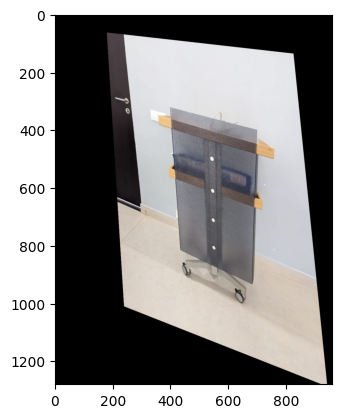

In [26]:
# Use homography to warp the align image to the align image
height, width = (refer_image.shape[0], refer_image.shape[1] ) # get height and width of reference image
warped_image = cv2.warpPerspective(align_image, H, (width, height))

plt.imshow(warped_image)


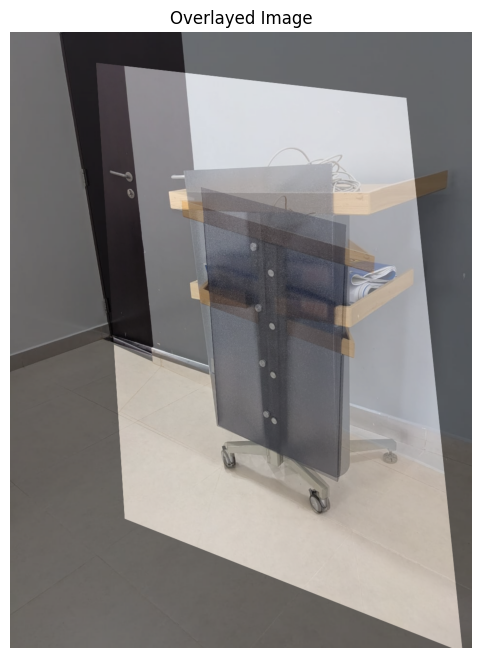

In [27]:
# Define the transparency factor (between 0 and 1) 0.5 for balanced transparency
alpha = 0.5

# Overlay the reference image and the warped image
overlay = cv2.addWeighted(refer_image, alpha, warped_image, 1 - alpha, 0)

# Vizualize the overlay image
plt.figure(figsize=[8,8])
plt.imshow(overlay)
plt.title('Overlayed Image')
plt.axis('off')
plt.show()

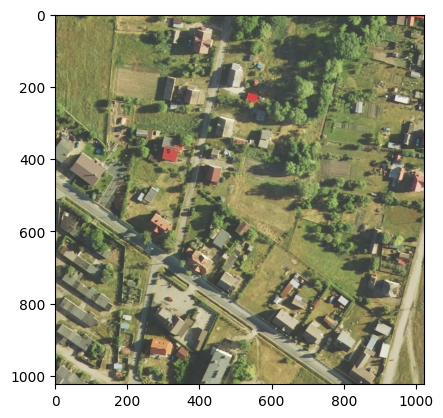

In [28]:
# Gaussian pyramid and Laplacian pyramid

# read the original image
q3_image= cv2.imread("/content/drive/MyDrive/ML4EO Course/Assignment 3/Q3.2.TIF")
q3_image = cv2.cvtColor(q3_image, cv2.COLOR_BGR2RGB)      ## change image color frorm BRG to RGB
plt.imshow(q3_image)
plt.show()

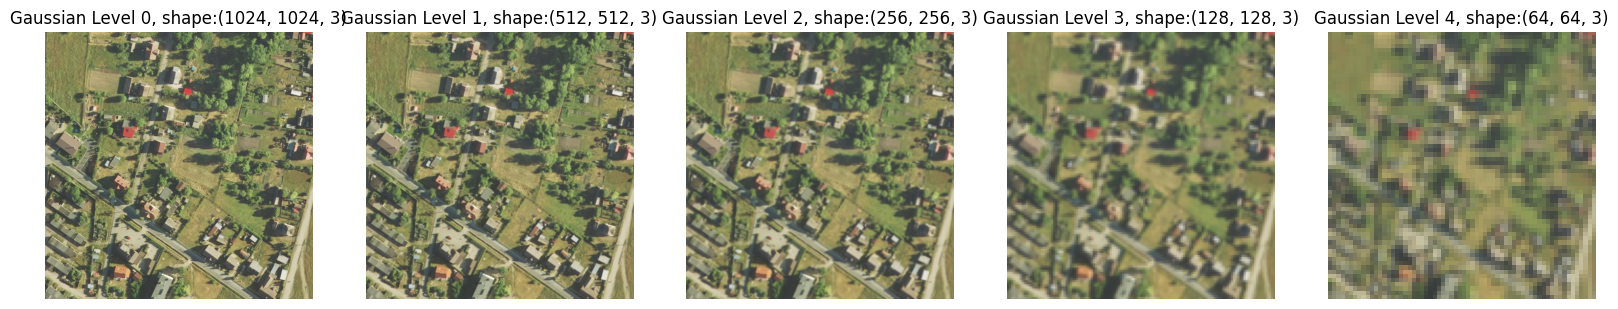

In [29]:
# Gaussian Pyramid

# Create an empty list to keep the pyramid images starting with the original image
gaussian_pyramid = [q3_image]

# Generate the Gaussian pyramid with 4 levels
for i in range(4):
    level = cv2.pyrDown(gaussian_pyramid[i])  # Downsample last image in the list
    gaussian_pyramid.append(level)

# Plot each of the pyramid levels
plt.figure(figsize=(20, 10))
for i, image in enumerate(gaussian_pyramid):
    plt.subplot(1, len(gaussian_pyramid), i + 1)  # length of pyramid which is 5 for the number of images (original + 4 levels)
    plt.imshow(image)
    plt.title(f'Gaussian Level {i}, shape:{gaussian_pyramid[i].shape}')
    plt.axis('off')
plt.show()

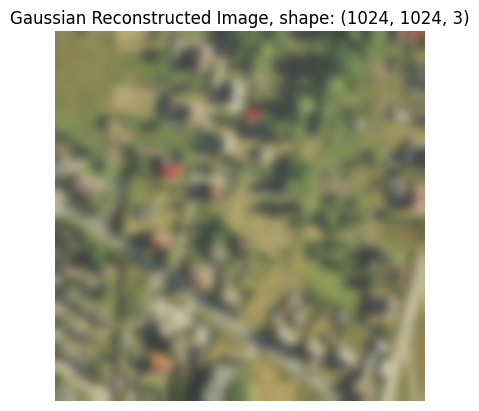

In [30]:
# Reconstruction from the Gaussian Pyramid

current_level = gaussian_pyramid[-1]      # Create a list to store the pyramids and Start with the latest image

for i in range(4, 0, -1):  # Start from the last level up to the second level
    # Upsample to size of next level
    size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
    current_level = cv2.pyrUp(current_level, dstsize=size)   #upsampling every image

# Vizualize the final reconstructed image (level0)
plt.imshow(current_level)
plt.title(f'Gaussian Reconstructed Image, shape: {current_level.shape}')
plt.axis('off')
plt.show()


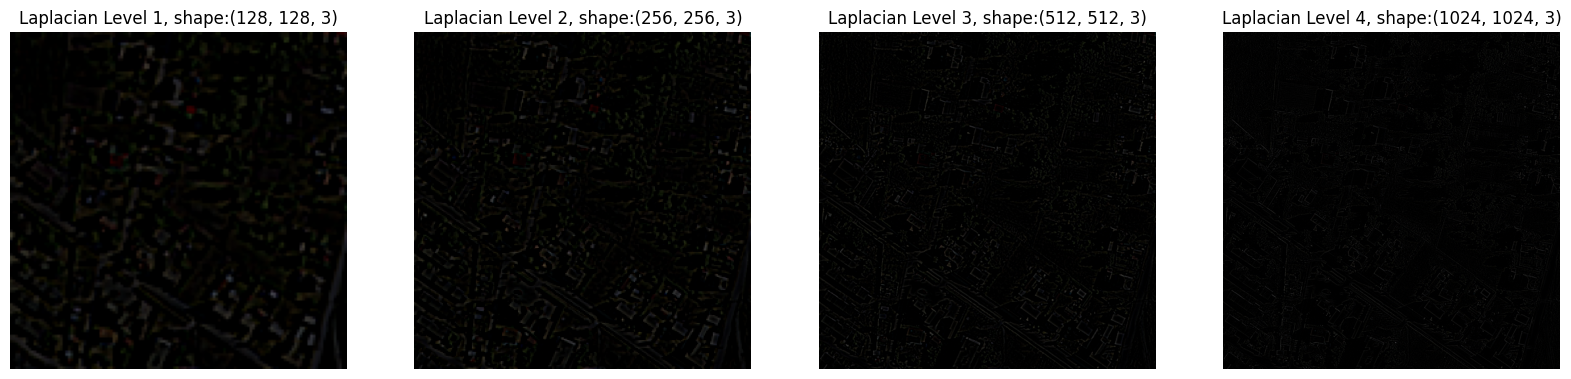

In [31]:
# Laplacian Pyramid: Laplacian Pyramids are formed from the Gaussian Pyramids

# create an empty list to store the laplacian pyramids
laplacian_pyramid = []
for i in range(4, 0, -1):  # Iterating through the Gaussian pyramid
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])  # Size of the next layer up
    # Upsample the current Gaussian layer to match the size of the next larger layer
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    # Subtract the upsampled image from the next larger Gaussian layer to get the Laplacian layer
    laplacian_layer = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)
    laplacian_pyramid.append(laplacian_layer)  # append results to the empty list

# Plotting the Laplacian Pyramid
plt.figure(figsize=(20, 10))
for i, image in enumerate(reversed(laplacian_pyramid)):  # Reversed for correct order visualization
    plt.subplot(1, len(laplacian_pyramid), len(laplacian_pyramid) - i) # subplot  the current Laplacian layer 1 row 4 layers
    # plot image
    plt.imshow(image)
    plt.title(f'Laplacian Level {len(laplacian_pyramid) - i}, shape:{image.shape}')
    plt.axis('off')
plt.show()


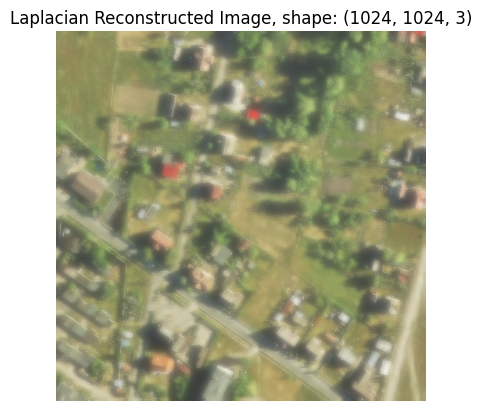

In [32]:
# Reconstruct the image from the Laplacian Pyramid
reconstructed_image = gaussian_pyramid[-1]  # Start with the smallest Gaussian image (which is the same size as the smallest Laplacian)

for i in range(4, 0, -1):  # Start from the smallest level
    # Upsample the current reconstructed image to the size of the next Laplacian level
    size = (laplacian_pyramid[i - 2].shape[1], laplacian_pyramid[i - 2].shape[0])  # Size of the next Laplacian level
    upsampled = cv2.pyrUp(reconstructed_image) #upsample the layers
    # resize the upsampled image to exactly match the size of the corresponding Laplacian layer
    upsampled = cv2.resize(upsampled, (laplacian_pyramid[i - 2].shape[1], laplacian_pyramid[i - 2].shape[0]))

    # Add the upsampled image to the corresponding Laplacian level
    reconstructed_image = cv2.add(upsampled, laplacian_pyramid[i - 2])

# Display the reconstructed image
plt.imshow(reconstructed_image)
plt.title(f'Laplacian Reconstructed Image, shape: {reconstructed_image.shape}')
plt.axis('off')
plt.show()

